<a href="https://colab.research.google.com/github/Sinchan08/Web_scrap_project/blob/main/webscrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install feedparser beautifulsoup4 wordcloud pandas matplotlib


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.2 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=34e5b386e550fbccbff71ea0fda4e4b1852931026468b96ce59376087f5a6731
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [7]:
import requests
import pandas as pd
import feedparser
from bs4 import BeautifulSoup

# Define categories
CATEGORIES = {
    "AI": "cs.AI",
    "Data Science": "cs.LG",
    "Blockchain": "cs.CR"
}

# Function to fetch research papers with pagination
def fetch_arxiv_papers(category, max_results=100, total_results=1500):
    base_url = "http://export.arxiv.org/api/query?"
    all_papers = []

    # Loop for pagination to fetch more data
    for start in range(0, total_results, max_results):
        query = f"search_query=cat:{category}&start={start}&max_results={max_results}&sortBy=lastUpdatedDate&sortOrder=descending"
        response = requests.get(base_url + query)

        if response.status_code != 200:
            print(f"Error fetching data for {category}")
            break

        feed = feedparser.parse(response.content)

        for entry in feed.entries:
            soup = BeautifulSoup(entry.summary, "html.parser")  # Clean abstract
            paper = {
                "Title": entry.title,
                "Authors": ", ".join(author.name for author in entry.authors),
                "Abstract": soup.text,
                "Published Date": entry.published,
                "arXiv Link": entry.link
            }
            all_papers.append(paper)

        # Stop if fewer results than expected are returned (end of records)
        if len(feed.entries) < max_results:
            break

    return all_papers

# Fetch papers from different categories with higher limits
all_papers = []
for category, code in CATEGORIES.items():
    print(f"Fetching {category} papers...")
    papers = fetch_arxiv_papers(code, max_results=100, total_results=1500)  # Fetch 1500 results per category
    for paper in papers:
        paper["Category"] = category
    all_papers.extend(papers)

# Convert to DataFrame
df = pd.DataFrame(all_papers)

# Save results to a CSV file
df.to_csv("arxiv_papers.csv", index=False)

# Display sample results
print(f"Fetched {len(df)} papers.")
df.head(20)


Fetching AI papers...
Fetching Data Science papers...
Fetching Blockchain papers...
Fetched 3200 papers.


,Title,Authors,Abstract,Published Date,arXiv Link,Category
0,HCAST: Human-Calibrated Autonomy Software Tasks,"David Rein, Joel Becker, Amy Deng, Seraphina N...",To understand and predict the societal impacts...,2025-03-21T17:54:01Z,http://arxiv.org/abs/2503.17354v1,AI
1,NdLinear Is All You Need for Representation Le...,"Alex Reneau, Jerry Yao-Chieh Hu, Zhongfang Zhu...",Many high-impact machine learning tasks involv...,2025-03-21T17:52:44Z,http://arxiv.org/abs/2503.17353v1,AI
2,RAGO: Systematic Performance Optimization for ...,"Wenqi Jiang, Suvinay Subramanian, Cat Graves, ...","Retrieval-augmented generation (RAG), which co...",2025-03-18T18:58:13Z,http://arxiv.org/abs/2503.14649v2,AI
3,Align Your Rhythm: Generating Highly Aligned D...,"Congyi Fan, Jian Guan, Xuanjia Zhao, Dongli Xu...","Automatically generating natural, diverse and ...",2025-03-21T17:42:50Z,http://arxiv.org/abs/2503.17340v1,AI
4,Temporal-Spatial Attention Network (TSAN) for ...,"Bisola Faith Kayode, Akinyemi Sadeeq Akintola,...",Denial-of-Service (DoS) attacks remain a criti...,2025-03-20T11:31:45Z,http://arxiv.org/abs/2503.16047v2,AI
5,Can AI expose tax loopholes? Towards a new gen...,"Peter Fratrič, Nils Holzenberger, David Restre...",The legislative process is the backbone of a s...,2025-03-21T17:40:06Z,http://arxiv.org/abs/2503.17339v1,AI
6,Capturing Individual Human Preferences with Re...,"André Barreto, Vincent Dumoulin, Yiran Mao, Ni...",Reinforcement learning from human feedback usu...,2025-03-21T17:39:33Z,http://arxiv.org/abs/2503.17338v1,AI
7,Efficient Intent-Based Filtering for Multi-Par...,"Reem Gody, Mohamed Abdelghaffar, Mohammed Jabr...",Large language models (LLMs) have showcased re...,2025-03-21T17:34:37Z,http://arxiv.org/abs/2503.17336v1,AI
8,GreenIQ: A Deep Search Platform for Comprehens...,"Oluwole Fagbohun, Sai Yashwanth, Akinyemi Sade...","This study introduces GreenIQ, an AI-powered d...",2025-03-20T11:19:43Z,http://arxiv.org/abs/2503.16041v2,AI
9,CVE-Bench: A Benchmark for AI Agents' Ability ...,"Yuxuan Zhu, Antony Kellermann, Dylan Bowman, P...",Large language model (LLM) agents are increasi...,2025-03-21T17:32:32Z,http://arxiv.org/abs/2503.17332v1,AI


In [8]:
df.to_csv("arxiv_papers.csv", index=False)

# Provide a download link
from google.colab import files
files.download("arxiv_papers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

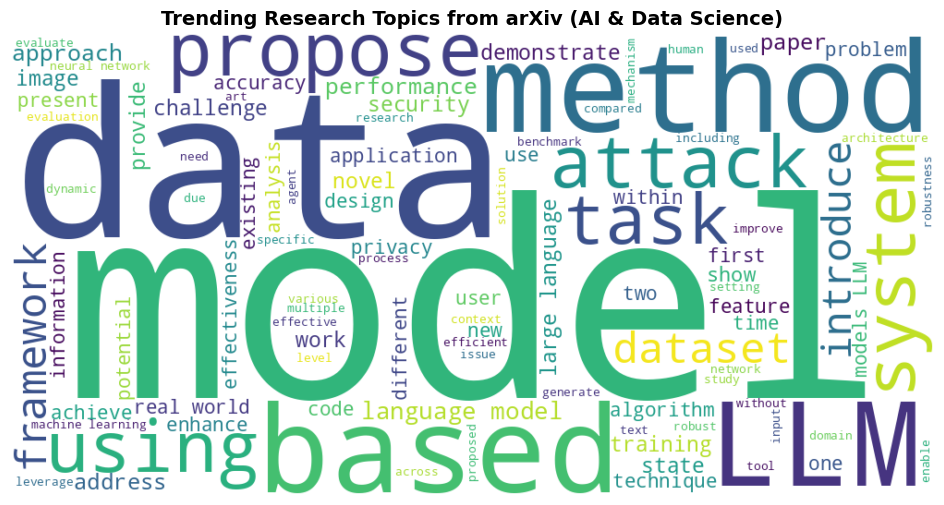

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Combine all abstracts into one text
text = " ".join(df["Abstract"])

# Define stopwords to remove common words
stopwords = set(STOPWORDS)

# Generate a professional word cloud
wordcloud = WordCloud(
    width=1000, height=500,
    background_color="white",
    colormap="viridis",  # Modern color scheme
    stopwords=stopwords,  # Removes common words
    max_words=100,  # Limits word count for clarity
    contour_width=2, contour_color="black"  # Adds a sleek outline
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Trending Research Topics from arXiv (AI & Data Science)", fontsize=14, fontweight="bold")
plt.show()


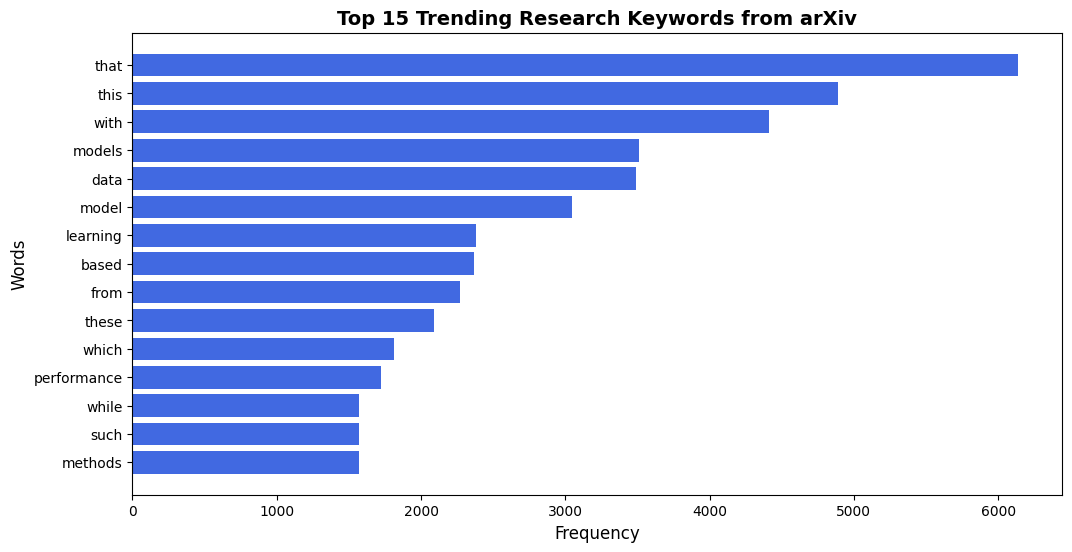

In [12]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re

# Combine all abstracts into one text
text = " ".join(df["Abstract"])

# Remove special characters & convert to lowercase
words = re.findall(r"\b[a-zA-Z]{4,}\b", text.lower())  # Min length 4 to avoid short words

# Count word frequency
word_counts = Counter(words)
common_words = word_counts.most_common(15)  # Get top 15 words

# Convert to DataFrame
df_words = pd.DataFrame(common_words, columns=["Word", "Frequency"])

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(df_words["Word"], df_words["Frequency"], color="royalblue")
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.title("Top 15 Trending Research Keywords from arXiv", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()  # Flip order for better readability
plt.show()


In [13]:
from tabulate import tabulate

# Print words in a nice tabular format
print(tabulate(df_words, headers="keys", tablefmt="pretty"))


+----+-------------+-----------+
|    |    Word     | Frequency |
+----+-------------+-----------+
| 0  |    that     |   6138    |
| 1  |    this     |   4888    |
| 2  |    with     |   4414    |
| 3  |   models    |   3509    |
| 4  |    data     |   3490    |
| 5  |    model    |   3043    |
| 6  |  learning   |   2384    |
| 7  |    based    |   2365    |
| 8  |    from     |   2270    |
| 9  |    these    |   2087    |
| 10 |    which    |   1816    |
| 11 | performance |   1720    |
| 12 |    while    |   1572    |
| 13 |    such     |   1572    |
| 14 |   methods   |   1569    |
+----+-------------+-----------+
